## EDA

### Multivariable Analysis

In [1]:
#Importamos y guardamos el dataframe

import pandas as pd

RUTA_DATAFRAME = '/home/tr4shhh/Desktop/Proyects/4geeks/15_Regresion_lineal_regularizada/regularized-linear-regression/data/interim/demographic_best_columns.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [2]:
df

,% White-alone,% Black-alone,R_death_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,...,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,target
0,76.725239,19.630942,9.6,11.3,32.6,27.7,13.8,19.3,19.5,59338.0,...,8.7,8.6,7.3,9.9,11.9,13.8,3.1,2.9,3.3,12.9
1,87.285228,8.940382,10.3,9.7,27.6,31.3,9.8,13.9,13.1,57588.0,...,8.7,8.6,7.2,10.1,11.0,13.1,3.2,3.0,3.5,12.0
2,49.069571,48.398376,12.9,27.0,35.7,12.2,30.9,43.9,36.7,34382.0,...,11.8,12.1,10.7,13.3,18.6,20.6,4.5,4.2,4.8,19.7
3,76.834821,21.294643,11.4,16.8,47.3,11.5,21.8,27.8,26.3,46064.0,...,9.3,10.0,8.8,11.3,13.2,14.9,3.3,3.1,3.6,14.1
4,95.878285,1.642462,11.4,19.8,34.0,12.6,13.2,18.0,15.5,50412.0,...,10.1,10.5,9.1,12.0,12.6,14.5,3.4,3.2,3.7,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,93.835219,1.375113,7.0,9.0,33.3,22.0,8.4,10.0,8.5,73315.0,...,6.4,6.6,5.7,7.7,8.3,9.6,2.6,2.4,2.8,8.9
3136,95.190850,0.758199,3.2,5.6,13.2,57.4,6.3,6.7,5.9,99087.0,...,5.8,4.9,4.0,6.0,6.5,8.0,2.4,2.2,2.6,7.2
3137,95.354451,0.827627,7.2,7.2,40.1,15.4,10.0,12.1,10.6,63401.0,...,7.9,8.0,7.0,9.2,9.5,11.2,3.0,2.8,3.2,10.4
3138,94.483196,0.507292,10.7,10.4,30.3,21.5,11.9,16.1,14.5,55190.0,...,9.0,8.3,7.1,9.6,10.3,12.1,3.4,3.2,3.7,11.3


#### Numerical - Numerical

In [3]:
all_numericas = df

In [4]:
all_numericas.columns


Index(['% White-alone', '% Black-alone', 'R_death_2018',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018',
       'CI90LBINC_2018', 'CI90UBINC_2018', 'Unemployment_rate_2018',
       'Median_Household_Income_2018',
       'Med_HH_Income_Percent_of_State_Total_2018', 'anycondition_prevalence',
       'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI',
       'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI',
       'Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI',
       'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'target'],
      dtype='object')

<Axes: label='a2'>

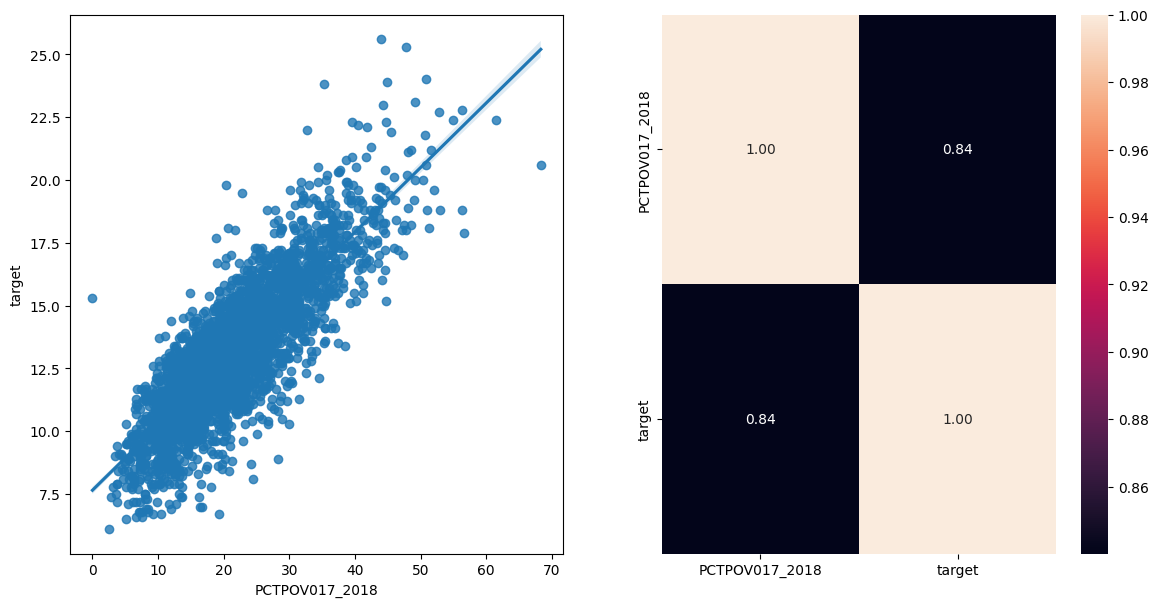

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Comparamos dos variables con regplot y heatmap
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (14, 7))

data = all_numericas
x_1 = 'PCTPOV017_2018'
y_1 = 'target'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])


<Axes: label='a2'>

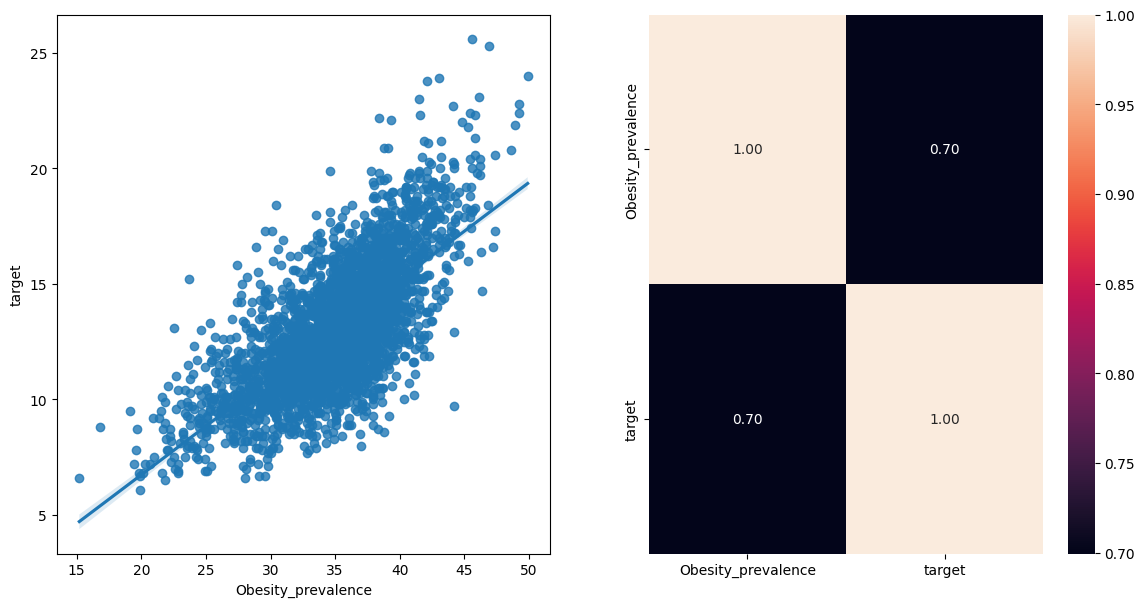

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Comparamos dos variables con regplot y heatmap
fig, axis = plt.subplot_mosaic([['a1','a2']], figsize = (14, 7))

data = all_numericas
x_1 = 'Obesity_prevalence'
y_1 = 'target'

sns.regplot(ax = axis['a1'], data = data, x = x_1, y = y_1)
sns.heatmap(data[[x_1, y_1]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])


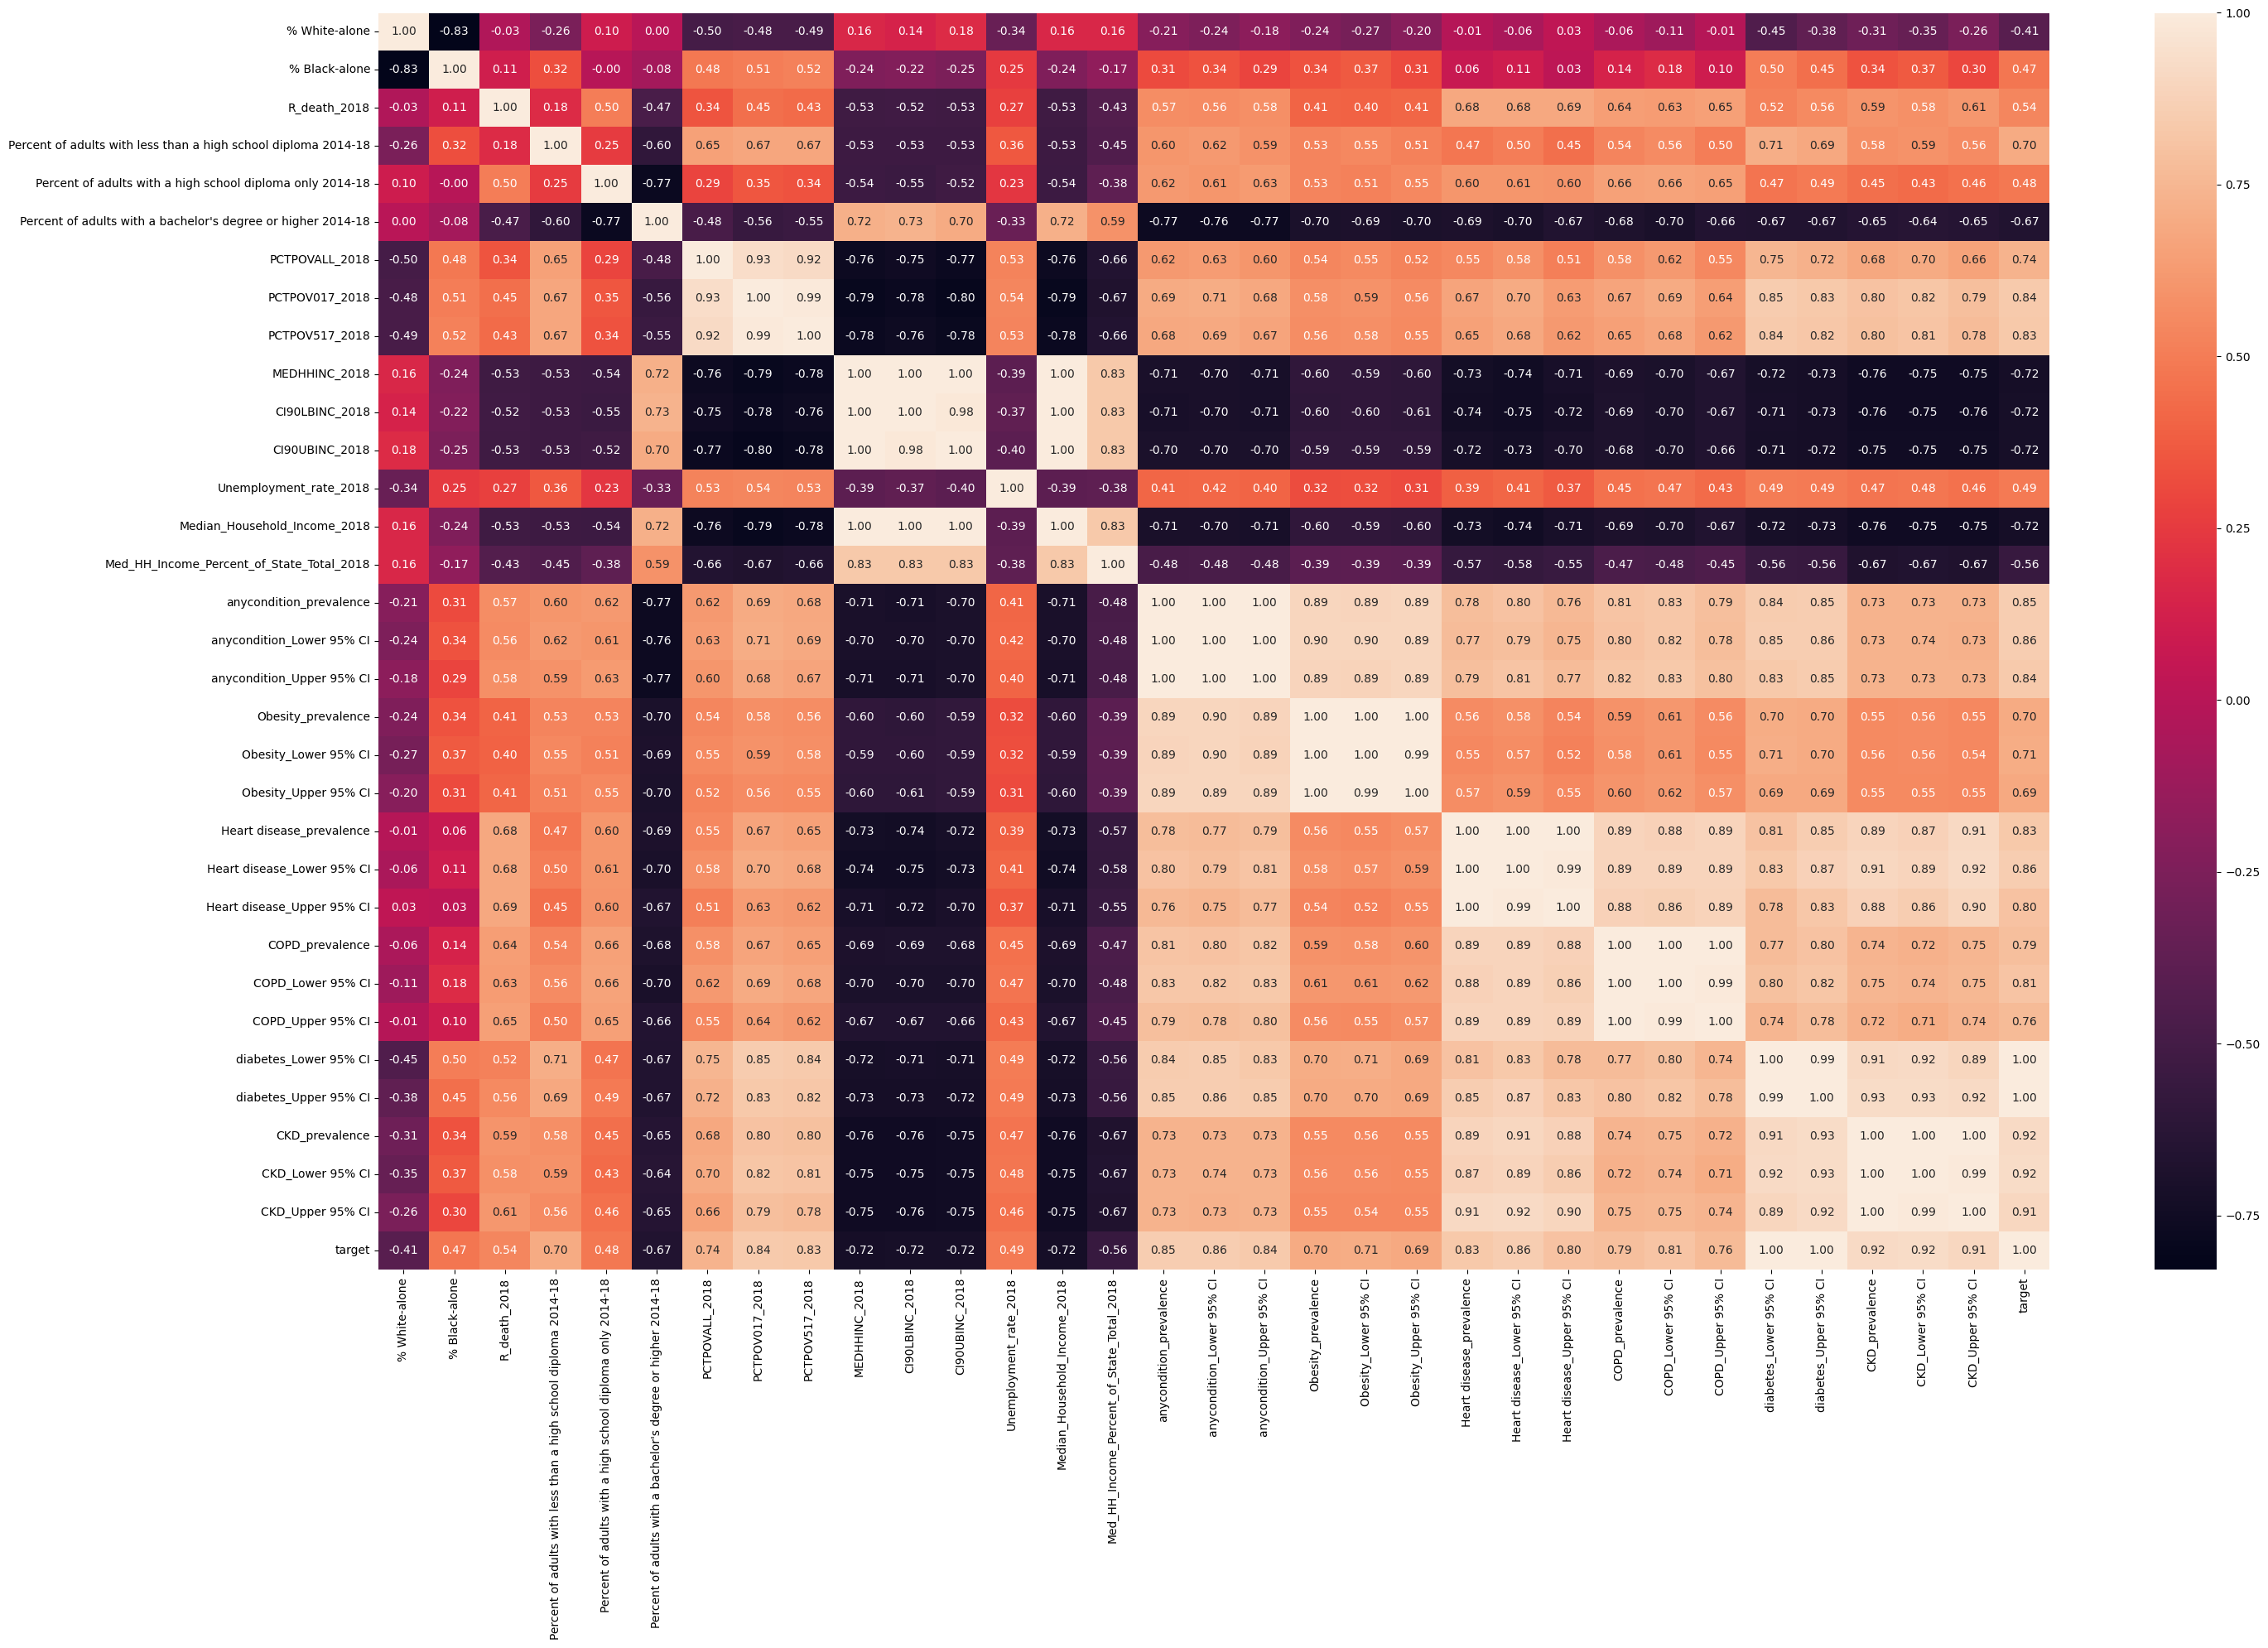

In [7]:
#Creamos el heatmap

import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (30, 20))

sns.heatmap((all_numericas.corr()), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [8]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# #Creamos el pairplot

# valor_hue = ''

# if valor_hue != '':
#     sns.pairplot(df, diag_kind="hist", hue=valor_hue)
# else:
#     sns.pairplot(df, diag_kind="hist")

### Train - Test Split

In [9]:
#Dividimos en Train - Tests / Predictoras - Target

from sklearn.model_selection import train_test_split

size_test= 0.2
target = 'target'

X = all_numericas.drop(target,axis=1)
y = all_numericas[target]

# Usar stratify solo en clasificación, nunca en regresión
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = size_test, random_state = 42)


### Standarization

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Guardamos las columnas
X_train_columns = X_train.columns
X_test_columns = X_test.columns

#Normalizamos las predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Guardamos los datos normalizados con sus columnas y sus indices
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_train_columns)


### Save scaler and data

In [11]:
import pickle

#Cambiar el objeto por el que queramos guardar
objeto = scaler

ruta_guardado = '../models/scaler.pkl'

with open(ruta_guardado, "wb") as archivo:
    pickle.dump(objeto, archivo)

In [12]:
# save as csv

# Con Index = False, no guardamos el indice en el archivo resultante
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
X_train_scaled.to_csv("../data/processed/X_train_scaled.csv", index=False)
X_test_scaled.to_csv("../data/processed/X_test_scaled.csv", index=False)

y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)
